# Machine Learning

In this tutorial, we will discover and implement various regression and classification algorithms. We will learn how to utilize of the popular `sklearn` library to implement most of our algorithms. You should see how easy it is to use this library as it consist basically in instantiating a class and calling its method `fit`. For instance to perform a linear regression:

```
lin_reg = LinearRegression()
lin_reg.fit(X, y)
```

Run the notebook in Google colab:
https://colab.research.google.com/github/heprom/cvml/blob/main/corrections/machine_learning_cor.ipynb

As usual, start by importing `numpy` and the `pyplot` module from `matplotlib`

In [1]:
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

import numpy as np

## Linear regression

start by creating some linear data with only one feature using $y=3+4x$ and some gaussian noise. Use $n=100$ to create the data set.

In [3]:
np.random.seed(12)
n = 100
x = 3 * np.random.rand(n, 1)
y = 3 + 4 * x + np.random.randn(n, 1)


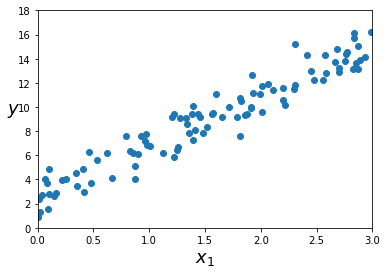

In [4]:
plt.plot(x, y, 'o')
plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$y$', rotation=0, fontsize=18)
plt.axis([0, 3, 0, 18])
plt.show()

Apply the bias trick to mak a (n, 2) array wit a column of 1 and a column with the first feature.

In [5]:
X = np.c_[np.ones(x.shape[0]), x]
print('shape of X with bias: {}'.format(X.shape))
print(np.dot(X.T, X).shape)

shape of X with bias: (100, 2)
(2, 2)
(2, 1)
found optimal parameters w0 = 2.61 and w1 = 4.15


Find the optimal solution using the Normal equation: $w=(X^T.X)^{-1}.X^T.y$

In [ ]:
w = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
print(w.shape)
print('found optimal parameters w0 = {:.2f} and w1 = {:.2f}'.format(w[0, 0], w[1, 0]))

Make a prediction using our solution and superimpose it to the data points.

In [6]:
x_plot = np.array([0, 3])
x_plot = np.c_[np.ones(x_plot.shape[0]), x_plot]
y_pred = np.dot(x_plot, w)

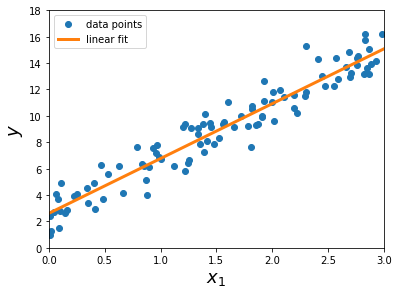

In [7]:
plt.plot(x, y, 'o', label='data points')
plt.plot([0, 3], y_pred, '-', lw=3, label='linear fit')
plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18)
plt.axis([0, 3, 0, 18])
plt.legend()
plt.subplots_adjust(top=0.95)
plt.savefig('linear_regression.pdf')
plt.show()

Linear regression works seamlessly in any dimension, let's try an example in 3D. This is useful to find the equation of a plane the best fit a set of data points.

In [8]:
# example in 3D
np.random.seed(12)
x1 = 2 * np.random.rand(100, 1)
x2 = 3 * np.random.rand(100, 1)
yy = 1 + 2 * x1 + np.random.randn(100, 1) + 3 * x2 + np.random.randn(100, 1)

X = np.c_[np.ones(x.shape[0]), x1, x2]
w = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(yy)
print(w.shape)
print('found optimal parameters w0 = {:.2f}, w1 = {:.2f} and w2 = {:.2f}'.format(*w[:, 0]))

(3, 1)
found optimal parameters w0 = 1.01, w1 = 1.84 and w2 = 3.00


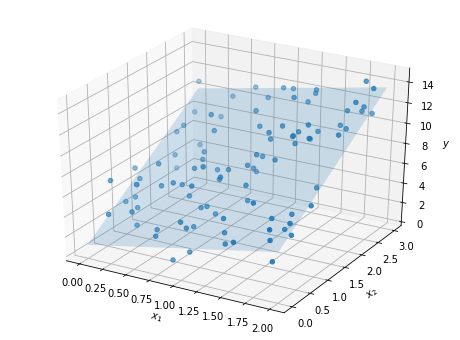

In [9]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# plot the plane surface
xx1, xx2 = np.meshgrid(range(3), range(4))
yyy = w[0, 0] + w[1, 0] * xx1 + w[2, 0] * xx2
ax.plot_surface(xx1, xx2, yyy, alpha=0.2)

# plot our data points
ax.scatter(x1, x2, yy)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$y$')
plt.savefig('linear_regression_3D.pdf')
plt.show()

## Linear regression using batch gradient descent

Here we start by running a full batch gradient descent and plot the evolution of the prediction. Play with the learning rate $\eta$ to see the effect of this hyperparameter.

In [10]:
eta = 0.1
n_epochs = 100
np.random.seed(12)
w = np.random.randn(2, 1)
X = np.c_[np.ones(x.shape[0]), x]
print('shape of X with bias: {}'.format(X.shape))
print(2/n * X.T.dot(X.dot(w) - y))  # first gradient, size 1+d

#dW = np.zeros_like(w)
#dW1 = 2*X[1]*(X[1].dot(w) - y[1])
#dW[:, 0] += dW1
for i in range(n):
    dW = np.zeros_like(w)
    dWi = 2 * X[i]*(X[i].dot(w) - y[i])
    dW[:, 0] += dWi
#dW /= n
print(dW)


shape of X with bias: (100, 2)
[[-19.05508287]
 [-36.99438375]]
[[-23.93431423]
 [-46.1639894 ]]


Now re-run the optimization to plot the evolution of the prediction. Play with the learning rate $\eta$ to see the effect of this hyperparameter.

[[ 0.47298583]
 [-0.68142588]]


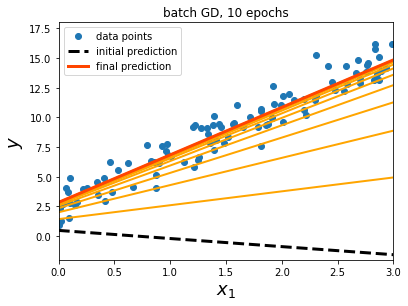

In [11]:
np.random.seed(12)
w = np.random.randn(2, 1)
print(w)
eta = 0.05
n_epochs = 10

plt.figure()
plt.plot(x, y, 'o', label='data points')
y_pred = np.dot(x_plot, w)
plt.plot([0, 3], y_pred, 'k--', lw=3, label='initial prediction')

for epoch in range(n_epochs):
    grad = 2/n * X.T.dot(X.dot(w) - y)
    w = w - eta * grad
    y_pred = np.dot(x_plot, w)
    plt.plot([0, 3], y_pred, '-', color='orange', lw=2)
y_pred = np.dot(x_plot, w)
plt.plot([0, 3], y_pred, '-', color='orangered', lw=3, label='final prediction')
plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18)
plt.axis([0, 3, -2, 18])
plt.legend()
plt.subplots_adjust(top=0.95)
plt.title('batch GD, {} epochs'.format(n_epochs))
plt.savefig('linear_regression_batch_GD.pdf')
plt.show()

One more time with stochastic gradient descent. Observe that with only 1 epoch the results are very good.

[[ 0.47298583]
 [-0.68142588]]


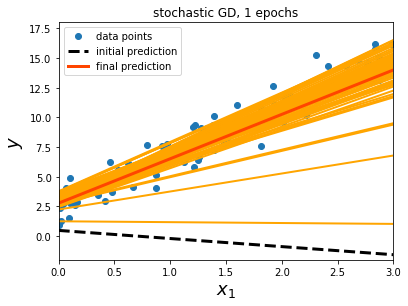

In [13]:
np.random.seed(12)
w = np.random.randn(2, 1)
print(w)
eta = 0.05
n_epochs = 1

plt.figure()
plt.plot(x, y, 'o', label='data points')
y_pred = np.dot(x_plot, w)
plt.plot([0, 3], y_pred, 'k--', lw=3, label='initial prediction')

for epoch in range(n_epochs):
    for i in range(n):
        index = np.random.randint(n)
        Xi = np.atleast_2d(X[index])
        grad = 2 * Xi.T.dot(Xi.dot(w) - y[index])
        w = w - eta * grad
        y_pred = np.dot(x_plot, w)
        plt.plot([0, 3], y_pred, '-', color='orange', lw=2)
y_pred = np.dot(x_plot, w)
plt.plot([0, 3], y_pred, '-', color='orangered', lw=3, label='final prediction')
plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18)
plt.axis([0, 3, -2, 18])
plt.legend()
plt.subplots_adjust(top=0.95)
plt.title('stochastic GD, {} epochs'.format(n_epochs))
plt.savefig('linear_regression_stochastic_GD.pdf')
plt.show()

## Polynomial regression

Polynomial regression is actually equivalent to linear regression except that we do not perform the regression in the same space. Power need to be added to each feature:

$$y^i=w_0+w_1 x^i_1+w_2 (x^i_2)^2+\ldots w_d (x^i_d)^d$$

In [14]:
np.random.seed(42)

n = 100
X = 6 * np.random.rand(n, 1) - 3
y = -0.2*X**3 + 0.5 * X**2 + X + 2 + np.random.randn(n, 1)

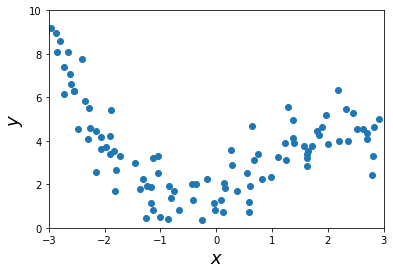

In [15]:
plt.plot(X, y, 'o')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()


In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

array([-0.75275929])

In [17]:
print(X[0])
print(X_poly[0])

array([-0.75275929,  0.56664654, -0.42654845])

Now we perform linear regression on the X_poly array. We make use of the `LinearRegression` class of `sklearn`.

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78437842]), array([[ 1.02570217,  0.56304305, -0.21702965]]))

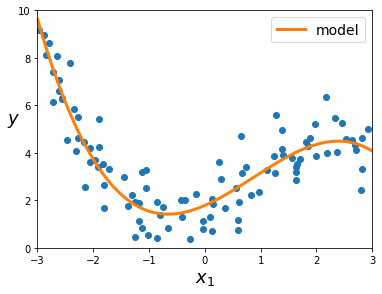

In [19]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'o')
plt.plot(X_new, y_new, '-', linewidth=3, label='model')
plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$y$', rotation=0, fontsize=18)
plt.legend(loc='upper right', fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.subplots_adjust(top=0.95)
plt.savefig('polynomial_regression.pdf')
plt.show()

Now let's play with the degree of polynomial regression $d$. Observe how too low $d$ and too high $d$ lead respectively to underfitting and overfitting.

In [2]:
import numpy as np
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, 'o')

lin_reg = LinearRegression()
for d in [3, 1, 30]:
    poly_features = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg.fit(X_poly, y)
    X_new_poly = poly_features.transform(X_new)
    y_new = lin_reg.predict(X_new_poly)
    plt.plot(X_new, y_new, '-', linewidth=3, label='order %d' % d)

plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$y$', rotation=0, fontsize=18)
plt.legend(loc='upper center', fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.subplots_adjust(top=0.95)
plt.savefig('polynomial_regression_varying_degree.pdf')
plt.show()


NameError: name 'plt' is not defined

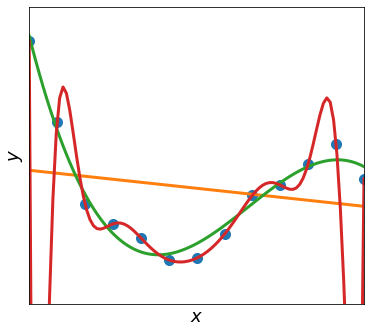

In [21]:
# eductional plot
n = 13
X = 6 * np.random.rand(n, 1) - 3
X = np.linspace(-3, 3, n, endpoint=True)
X = X.reshape((n, 1))
y = -0.2*X**3 + 0.5 * X**2 + X + 2 + 0.5 * np.random.randn(n, 1)

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
plt.figure(figsize=(6, 5))
plt.plot(X, y, 'o', markersize=10)

lin_reg = LinearRegression()
for d in [1, 3, 15]:
    poly_features = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg.fit(X_poly, y)
    X_new_poly = poly_features.transform(X_new)
    y_new = lin_reg.predict(X_new_poly)
    plt.plot(X_new, y_new, '-', linewidth=3, label='order %d' % d)

plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(top=0.95)
plt.savefig('under_and_overfitting.pdf')
plt.show()


## Regularized models

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

np.random.seed(42)
n = 27
X = 6 * np.random.rand(n, 1) - 3
X = np.linspace(-3, 3, n, endpoint=True)
X = X.reshape((n, 1))
y = -0.2*X**3 + 0.5 * X**2 + X + 2 + 1.0 * np.random.randn(n, 1)
X_new = np.linspace(-3, 3, 101, endpoint=True).reshape(101, 1)

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
scaler = StandardScaler()
scaler.fit(X_poly)
scaler.mean_
X_scaled = scaler.transform(X_poly)
print(X_scaled.shape)
model = Ridge(alpha=1.0)
print(y.shape)
model.fit(X_scaled, y)

# now predict
X_new_poly = poly_features.transform(X_new)

(27, 3)
(27, 1)


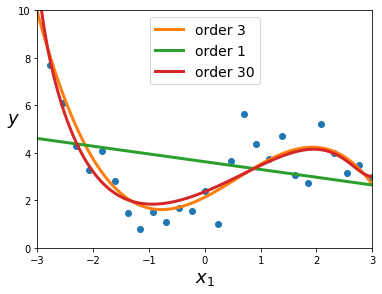

In [26]:
# using the closed form solution
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

plt.plot(X, y, 'o')

ridge_reg = Ridge(alpha=0.5, solver="cholesky", random_state=42)
for d in [3, 1, 30]:
    model = Pipeline([
            ("poly_features", PolynomialFeatures(degree=d, include_bias=False)),
            ("std_scaler", StandardScaler()),
            ("regul_reg", ridge_reg),
        ])
    model.fit(X, y)
    y_pred = model.predict(X_new)
    plt.plot(X_new, y_pred, '-', linewidth=3, label='order %d' % d)

plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$y$', rotation=0, fontsize=18)
plt.legend(loc='upper center', fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.subplots_adjust(top=0.95)
plt.savefig('polynomial_regression_regularized.pdf')
plt.show()

## Logistic regression

Here we have a look at logistic regression, which is in fact a binary classification model. It is illustrated using the popular iris data set.

Start by plotting the logistic function: $\sigma(x) = \dfrac{1}{1 + e^{-x}}$, observe that it is continuously derivable and bounded between 0 and 1.

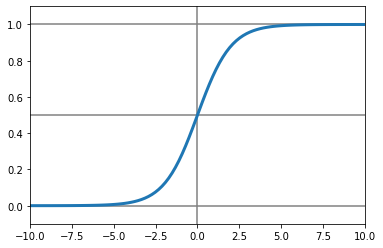

In [27]:
x = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x))
plt.figure()#figsize=(9, 3))
plt.axhline(y=0., color='gray')
plt.axhline(y=0.5, color='gray')
plt.axhline(y=1., color='gray')
plt.axvline(x=0., color='gray')
plt.plot(x, sigmoid, '-', linewidth=3)
plt.axis([-10, 10, -0.1, 1.1])
plt.savefig('logistic_function.pdf')
plt.show()


load the iris dataset

In [28]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

assign the petal length and petal width to X and the class target to y

In [30]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Start by creating a grid using the function `meshgrid` of numpy to plot our trained logistic function on the whole domain. Then we will plot also the decision boundary and the data points superimposed.

In [32]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)


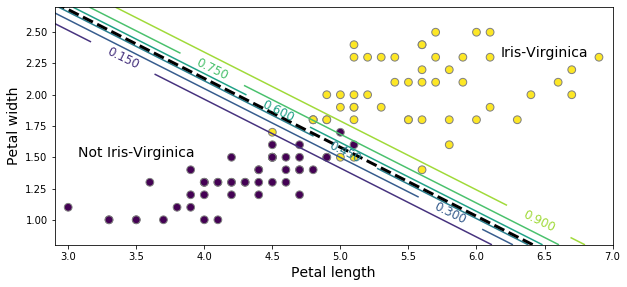

In [33]:
plt.figure(figsize=(10, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, edgecolors='gray')
# plot contours and decision boundary
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

contour = plt.contour(x0, x1, zz)#, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, 'k--', linewidth=3)

plt.text(3.5, 1.5, 'Not Iris-Virginica', fontsize=14, ha='center')
plt.text(6.5, 2.3, 'Iris-Virginica', fontsize=14, ha='center')
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.subplots_adjust(top=0.95)
plt.savefig('logistic_regression_iris.pdf')
plt.show()

## Softmax regression

To extend the logistic regression to multiple class (multinomial logistic regression), we now study Softmax regression. Here $k$ represent a class index with $K$ classes, $0\leq k < K$.

In [34]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
labels = ['Iris-Virginica', 'Iris-Versicolor', 'Iris-Setosa']
print(np.unique(y))

[0 1 2]


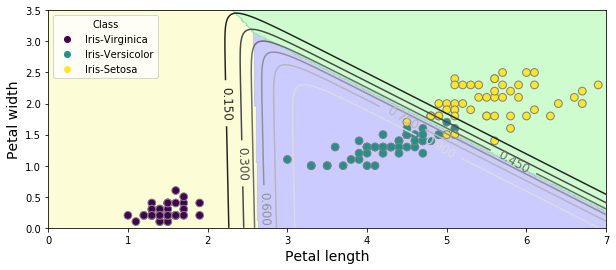

In [36]:
plt.figure(figsize=(10, 4))
plt.contourf(x0, x1, zz, alpha=0.5, cmap=custom_cmap)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=60, edgecolors='gray', label=labels)
contour = plt.contour(x0, x1, zz1, cmap='gray')
plt.clabel(contour, inline=1, fontsize=12)
plt.legend(handles=scatter.legend_elements()[0], labels=labels, title='Class')

plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
#plt.legend(loc='center left', fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.savefig('softmax_regression_iris.pdf')
plt.show()

## Estimating fatigue life using SVM regression

IN this section we will study a fatigue dataset where for each sample we know the defect size, the distance from the surface (from fracture surface observation), the macroscopic stress level and the number of cycles to failure. We will then derive a fatigue model using Support Vector Machines.

In [240]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, colors as mcolors
tab = mcolors.TABLEAU_COLORS
blue = tab['tab:blue']
red = tab['tab:red']
orange = tab['tab:orange']
green = tab['tab:green']
gray = tab['tab:gray']

# load the data set using pandas
data_path = '/home/proudhon/teaching/DMS/CVML/TP_cvml/fatigue/fatigue_defects.csv'
data = pd.read_csv(data_path)

In [241]:
data

,sq_CS,d_surf,stress,N_cycles
0,0.9407,0.2151,210.0,1312094
1,0.9959,0.4670,366.6,6741
2,0.5745,0.1118,279.7,2390432
3,1.0706,0.2250,243.0,1126373
4,0.5397,0.5927,404.3,126267
...,...,...,...,...
195,0.9621,0.4243,405.3,42212
196,0.5292,0.3260,499.3,18904
197,0.8062,0.2462,480.1,4086
198,0.9852,0.2359,393.2,43364


<Axes: >

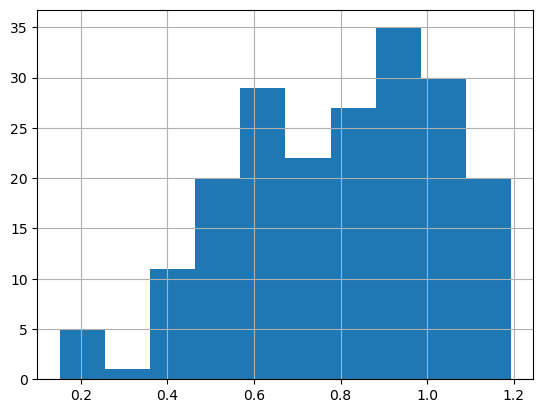

In [242]:
data['sq_CS'].hist()

<Axes: >

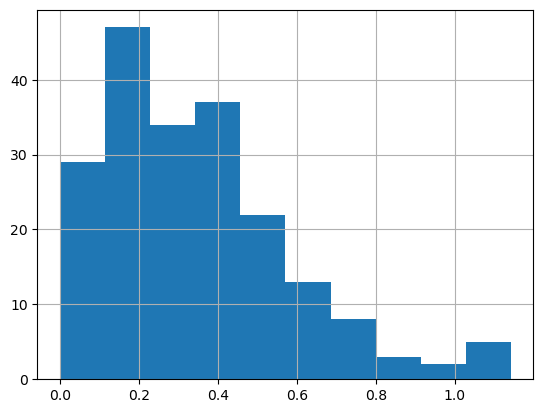

In [243]:
data['d_surf'].hist()

Now observe the distribution of the N_cycles feature and find out that we better use log(N_cycles) for our machine learning algorithm 

<Axes: >

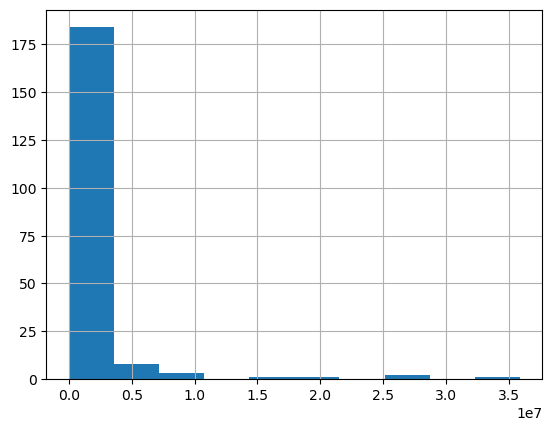

In [244]:
data['N_cycles'].hist()

<Axes: >

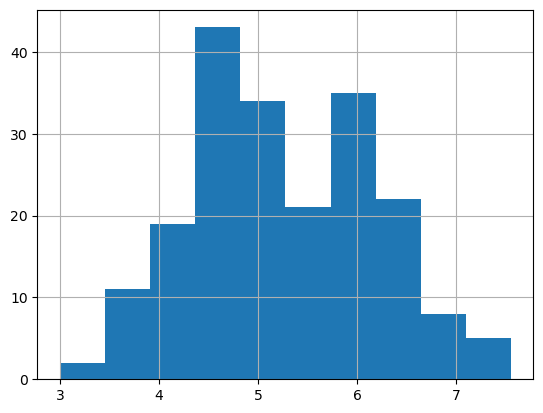

In [245]:
np.log10(data['N_cycles']).hist()

have a look at the data by plotting the nominal stress as a function of the defect size and using the number of cycles to failure as a color.

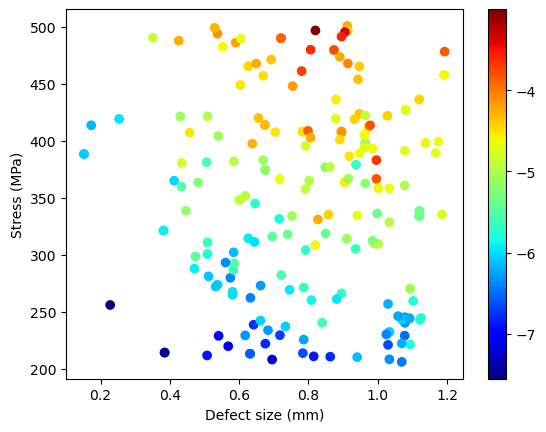

In [246]:
plt.figure()
plt.scatter(data['sq_CS'], data['stress'], c=-np.log10(data['N_cycles']), cmap='jet')
plt.xlabel('Defect size (mm)')
plt.ylabel('Stress (MPa)')
plt.colorbar()

Assign the first three columns as the features and the last one as the target

In [247]:
X = data[['sq_CS', 'd_surf', 'stress']]
y = np.log(data['N_cycles'])

In [248]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# normalize de data using a simple MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [249]:
# try a first model
model = SVR(kernel='poly', C=10., gamma=0.2, epsilon=0.01)
model.fit(X_train, y_train)

SVR(C=10.0, epsilon=0.01, gamma=0.2, kernel='poly')

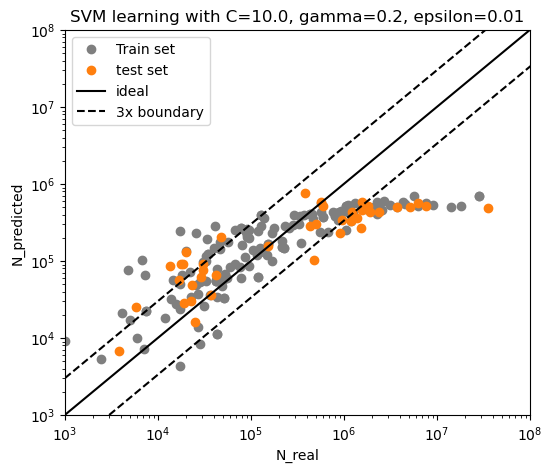

In [250]:
# make predictions with our trained model
y_train_pred = np.exp(model.predict(X_train))
y_test_pred = np.exp(model.predict(X_test))
y_train = np.exp(y_train)
y_test = np.exp(y_test)
linear = np.linspace(1e3, 1e8, 10)

plt.figure(figsize=(6, 5))
plt.plot(y_train, y_train_pred, 'o', color=gray, label='Train set')
plt.plot(y_test, y_test_pred, 'o', color=orange, label='test set')
plt.xscale('log')
plt.yscale('log')
plt.plot(linear, linear, '-', color='k', label='ideal')
plt.plot(3*linear, linear, '--', color='k', label='3x boundary')
plt.plot(linear, 3*linear, '--', color='k')
plt.xlabel('N_real')
plt.ylabel('N_predicted')
plt.title('SVM learning with C={}, gamma={}, epsilon={}'.format(model.C, model.gamma, model.epsilon))
plt.legend()
plt.axis([1e3, 1e8, 1e3, 1e8])
plt.show()

Now we perform a grid search with 5-fold cross validation to tune the hyper parameters

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

parameters = [{'kernel': ['poly', 'rbf'], 
               'gamma': [0.01, 0.1, 0.15, 0.2, .05],
               'C': [10.0, 12.5, 15, 17.5, 100, 1000],
               'epsilon': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0]}]

grid = GridSearchCV(model, parameters, cv=5, verbose=1)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best hyper parameters:", grid.best_estimator_)
print(grid.estimator)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
Best cross-validation score: 0.84
Best hyper parameters: SVR(C=1000, epsilon=0.5, gamma=0.1)
SVR(C=10.0, epsilon=0.01, gamma=0.2, kernel='poly')


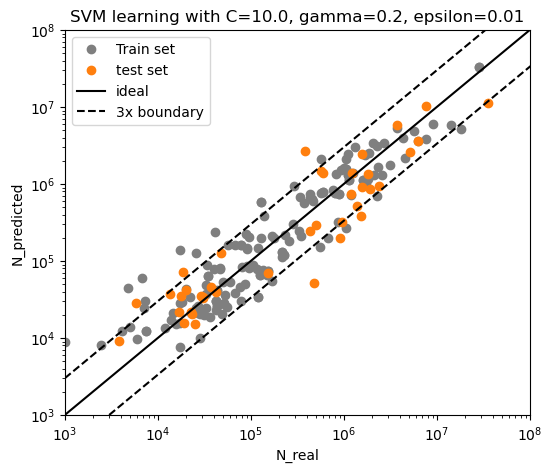

In [252]:
# make predictions with our optimized model
y_train_pred = np.exp(grid.predict(X_train))
y_test_pred = np.exp(grid.predict(X_test))
y_train = np.exp(y_train)
y_test = np.exp(y_test)

plt.figure(figsize=(6, 5))
plt.plot(y_train, y_train_pred, 'o', color=gray, label='Train set')
plt.plot(y_test, y_test_pred, 'o', color=orange, label='test set')
plt.xscale('log')
plt.yscale('log')
plt.plot(linear, linear, '-', color='k', label='ideal')
plt.plot(3*linear, linear, '--', color='k', label='3x boundary')
plt.plot(linear, 3*linear, '--', color='k')
plt.xlabel('N_real')
plt.ylabel('N_predicted')
plt.title('SVM learning with C={}, gamma={}, epsilon={}'.format(model.C, model.gamma, model.epsilon))
plt.legend()
plt.axis([1e3, 1e8, 1e3, 1e8])
plt.show()

With the identified model, answer the following questions : 
 1. What would be the life of a fatigue specimen with a defect of cross section 0.62 mm² located at 0.5 mm from the surface and stressed at 400 MPa?
 2. What if the defect size is now 0.31 mm ?

In [253]:
# re-run the code to have access to the data scaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [254]:
# create a data frame with our two data points to use the standard scaler
x = pd.DataFrame(np.array([[0.62, 0.5, 400.], [0.3, 0.5, 400.]]), columns=X.columns)
x = scaler.transform(x)
print(x)

[[0.44951484 0.43767507 0.65785908]
 [0.14208858 0.43767507 0.65785908]]


In [255]:
# predict the life for each case
np.exp(grid.predict(x)).astype(int)

array([ 52849, 230452])

Finally, build the S-N curve for these two defects

In [256]:
input1 = np.ones((31, 3))
for i in range(input1.shape[0]):
    input1[i] = [0.62, 0.5, 200. + 10 * i]
input2 = np.ones((31, 3))
for i in range(input2.shape[0]):
    input2[i] = [0.32, 0.5, 200. + 10 * i]

x1 = pd.DataFrame(input1, columns=X.columns)
x2 = pd.DataFrame(input2, columns=X.columns)
n_cycles_pred1 = np.exp(grid.predict(scaler.transform(x1)))
n_cycles_pred2 = np.exp(grid.predict(scaler.transform(x2)))

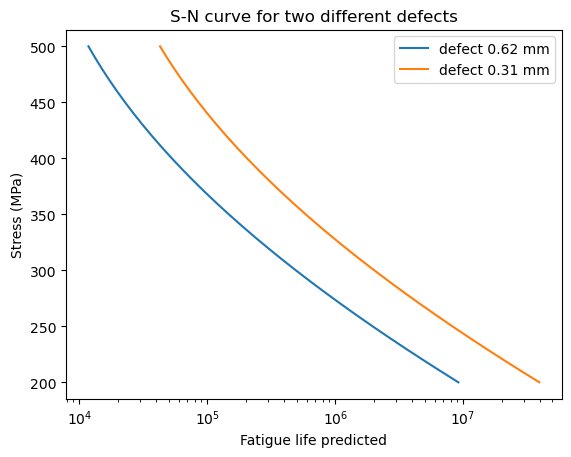

In [257]:
plt.plot(n_cycles_pred1, x1['stress'], label='defect 0.62 mm')
plt.plot(n_cycles_pred2, x2['stress'], label='defect 0.31 mm')
plt.xscale('log')
plt.xlabel('Fatigue life predicted')
plt.ylabel('Stress (MPa)')
plt.legend()
plt.title('S-N curve for two different defects')
plt.show()